# Test of Piecewise Smooth Quadratic Estimators

In [1]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
import interval as ival
import psqe_under as pq

Auxiliary plot routine

In [7]:
def plot_problem(flist, minlist, a, b):
    colors = ['r-', 'b-', 'g-', 'y-']
    step = (b-a)/1000.
    ta = np.arange(a, b + step, step)
    num_points = len(ta)
    num_funcs = len(flist)
    
    fta = np.empty([num_funcs, num_points])
    print(fta)
    
    for i in range(num_funcs):
        for j in range(num_points):
            fta[i,j] = flist[i](ta[j])
    lb = np.amin(fta)
    ub = np.amax(fta)
    d = (ub - lb) * 0.1
    for i in range(num_funcs):
        plt.plot(ta, fta[i,:], colors[i])
    for point in min_list:
        plt.scatter(point[0], point[1], s=20)
    plt.ylim([lb - d,ub + d])
    plt.show() 

Test problem

In [8]:
x = sym.symbols('x')
e_f = x**3 + 
e_df = sym.diff(e_f)
e_ddf = sym.diff(e_df)
print(e_f, e_df, e_ddf)
f = sym.lambdify(x, e_f)
df = sym.lambdify(x, e_df)
ddf = sym.lambdify(x, e_ddf)
print(f(2.), df(2.))
a = -1.
b = 3.
idef = ival.Interval([a,b])
# print(f(idef), df(idef), ddf(idef))
ddi = ddf(idef)
ddi

x**3 3*x**2 6*x
8.0 12.0


[-6.0, 18.0]

In [9]:

# estim = pq.PSQE_Under(a, b, ddi.x[0], ddi.x[1], f, df)
L = max(abs(ddi.x[0]), abs(ddi.x[1]))
# print(L)
estim_int = pq.PSQE_Under(a, b, ddi.x[0], ddi.x[1], f, df)
estim_lip = pq.PSQE_Under(a, b, -L, L, f, df)
print(estim_int)
print(estim_lip)
print(estim_lip.lower_bound_and_point())
min_list = [estim_int.lower_bound_and_point(), estim_lip.lower_bound_and_point()]
print(min_list)

delt =  2.0
delt =  2.6666666666666665
Estimator a = -1.0, b = 3.0, c = 0.6666666666666666, d = 2.6666666666666665, alp = -6.0, bet = 18.0, fa = -1.0, fb = 27.0, dfa = 3.0, dfb = 27.0
Estimator a = -1.0, b = 3.0, c = 0.0, d = 2.6666666666666665, alp = -18.0, bet = 18.0, fa = -1.0, fb = 27.0, dfa = 3.0, dfb = 27.0
[-1.0, 3.0, 0.8333333333333334]
(0.8333333333333334, -13.25)
[-1.0, 3.0, 1.0555555555555556]
[-1.0, 3.0, 0.8333333333333334]
[(1.0555555555555556, -5.694444444444444), (0.8333333333333334, -13.25)]


Vizualize test problem

[[ 6.92546054e-310  6.92546054e-310  2.78952942e-316 ...  6.92542732e-310
  -1.86159089e+239  6.92545711e-310]
 [ 6.92542732e-310  6.28402100e-294  6.92545942e-310 ...  6.92545192e-310
   6.92542143e-310 -7.26921221e+071]
 [ 6.92545192e-310  6.92542143e-310  2.15040010e+120 ...  4.83638884e-317
  -3.11576523e+256  6.92542160e-310]]


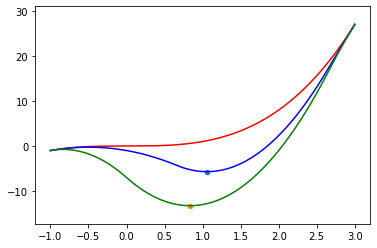

In [10]:
plot_problem([f,estim_int.estimator,estim_lip.estimator], min_list, a, b)